# Import libraries

In [150]:
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Merging Spreatsheets by year

In [91]:
cwd = os.chdir("C:/Users/JihenMahjoub/OneDrive - Huntsworth Health/Desktop/CC/Stuff/Other/Upwork/Dataset")
files = os.listdir(cwd)

df_2014 = pd.DataFrame()
df_2015 = pd.DataFrame()
df_2016 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Merging the files for the year: 2014
for f in files:
    if f.endswith(".xls") and "2014" in f:
        df_2014 = df_2014.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2015
for f in files:
    if f.endswith(".xls") and "2015" in f:
        df_2015 = df_2015.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))

# Merging the files for the year: 2016
for f in files:
    if f.endswith(".xls") and "2016" in f:
        df_2016 = df_2016.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2017
for f in files:
    if f.endswith(".xls") and "2017" in f:
        df_2017 = df_2017.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2018
for f in files:
    if f.endswith(".xls") and "2018" in f:
        df_2018 = df_2018.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        

# Profiling / clustering
## Based on people's transactions

Text(0, 0.5, 'ORIGINAL GROSS AMT')

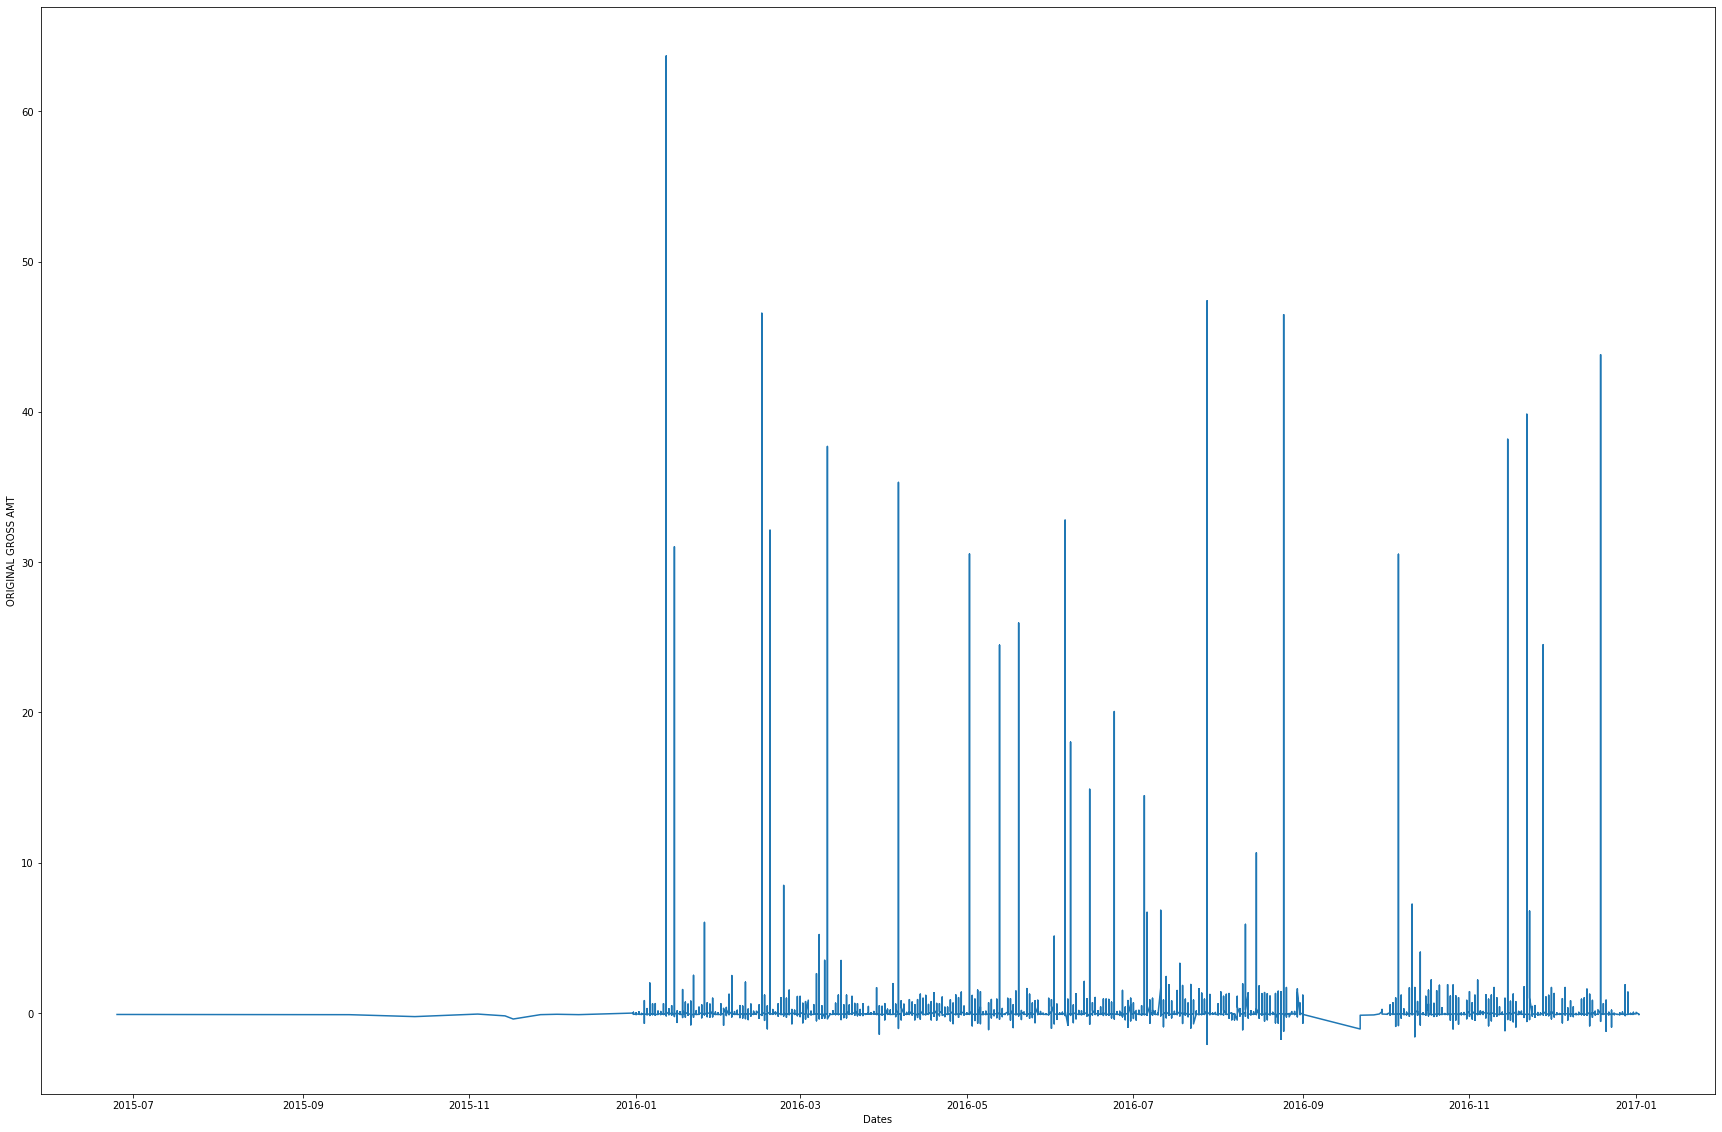

In [90]:
df_2016 = df_2016.drop('Directorates',axis=1)
df_2016 = df_2016.dropna()
df_2016 = df_2016.sort_values(by = 'TRANS DATE')
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

# Preprocessing

In [103]:
# # Dropping rows that contain NULL values from all DataFrames
df_2014 = df_2014.dropna()
df_2015 = df_2015.dropna()
df_2016 = df_2016.drop('Directorates',axis=1)
df_2016 = df_2016.dropna()
df_2017 = df_2017.dropna()
df_2018 = df_2018.dropna()

# # Standardizing the ORIGINAL GROSS AMT variable
df_2014_orig_gross_amt= pd.DataFrame(df_2014['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2015_orig_gross_amt= pd.DataFrame(df_2015['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2016_orig_gross_amt= pd.DataFrame(df_2016['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2017_orig_gross_amt= pd.DataFrame(df_2017['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2018_orig_gross_amt= pd.DataFrame(df_2018['ORIGINAL GROSS AMT'].values.reshape(-1, 1))

df_2014['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2014_orig_gross_amt)
df_2015['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2015_orig_gross_amt)
df_2016['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2016_orig_gross_amt)
df_2017['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2017_orig_gross_amt)
df_2018['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2018_orig_gross_amt)

# # Standardizing the BILLING GROSS AMT variable 

df_2017['BILLING GROSS AMT'] = StandardScaler().fit_transform(df_2017['BILLING GROSS AMT'].values.reshape(-1, 1))
df_2018['BILLING GROSS AMT'] = StandardScaler().fit_transform(df_2018['BILLING GROSS AMT'].values.reshape(-1, 1))

# # Standardizing the TRANS TAX AMT variable
df_2017['TRANS TAX AMT'] = StandardScaler().fit_transform(df_2017['TRANS TAX AMT'].values.reshape(-1, 1))

# # Sorting values by date
df_2014 = df_2014.sort_values(by = 'TRANS DATE')
df_2015 = df_2015.sort_values(by = 'TRANS DATE')
df_2016 = df_2016.sort_values(by = 'TRANS DATE')
df_2017 = df_2017.sort_values(by = 'TRANS DATE')
df_2018 = df_2018.sort_values(by = 'TRANS DATE')

In [104]:
df = df_2016
df.head()

,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
TRANS DATE,,,,,,,,,,
2015-06-25,VR,-0.099683,the consortium/wms,************6158,L080,Mat'l Raw/Drct,REABR,Bournville Junior,A00,CYP&F SCHOOLS
2015-09-18,VZ,-0.113460,currys online,************4193,J310,Other Fix&Fittings,REAMK,St Laurence CE Infant,A00,CYP&F SCHOOLS
2015-10-12,VR,-0.241841,currys online,************0381,P150,Aftercare Assistance,RV00G,16+ Accommodation & Support,A00,CYP&F
2015-11-04,VZ,-0.072931,paypal suziesvarie,************7587,K020,Vehicle Fuel,REAFA,Highfield Junior & Infant,A00,CYP&F SCHOOLS
2015-11-14,VR,-0.192347,credit adjustment,************0381,P150,Aftercare Assistance,RV00G,16+ Accommodation & Support,A00,CYP&F


# Exploratory analysis

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43973 entries, 2015-06-25 to 2017-01-02
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TRANS VAT DESC      43973 non-null  object 
 1   ORIGINAL GROSS AMT  43973 non-null  float64
 2   MERCHANT NAME       43973 non-null  object 
 3   CARD NUMBER         43973 non-null  object 
 4   TRANS CAC CODE 1    43973 non-null  object 
 5   TRANS CAC DESC 1    43973 non-null  object 
 6   TRANS CAC CODE 2    43973 non-null  object 
 7   TRANS CAC DESC 2    43973 non-null  object 
 8   TRANS CAC CODE 3    43973 non-null  object 
 9   Directorate         43973 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.7+ MB


In [106]:
# Analyse the original gross amt variable;

df['ORIGINAL GROSS AMT'].describe()

count    4.397300e+04
mean     3.806458e-17
std      1.000011e+00
min     -2.089971e+00
25%     -9.050942e-02
50%     -7.204117e-02
75%     -3.994587e-02
max      6.367468e+01
Name: ORIGINAL GROSS AMT, dtype: float64

In [108]:
df['TRANS VAT DESC'].value_counts()

VR    22391
VZ    21454
VE       73
VS       38
VL       16
VT        1
Name: TRANS VAT DESC, dtype: int64

In [109]:
df['MERCHANT NAME'].value_counts()

amazon uk marketplace        5837
amazon uk retail             2182
travelodge website           1270
asda home shopping            858
amazon uk retail amazon.c     583
                             ... 
cambabest t/c 2                 1
paypal visualstres              1
secure safe ltd                 1
www.jfilters.com                1
www.tes.co.uk                   1
Name: MERCHANT NAME, Length: 5884, dtype: int64

In [110]:
df['TRANS CAC CODE 1'].value_counts()

L100    9303
K020    5473
L220    4685
MC70    2848
L030    2071
        ... 
M600       1
N040       1
N050       1
L800       1
L250       1
Name: TRANS CAC CODE 1, Length: 110, dtype: int64

In [111]:
df['TRANS CAC DESC 1'].value_counts()

Equip Operational       9303
Vehicle Fuel            5473
Purchases Food          4685
Supplies & Sev Mic      2848
Books                   2071
                        ... 
HRM CO Building            1
Phon Centrx Netwk          1
HEALTH AUTHORITIES         1
AMO - Lighting             1
Insurance NonPremise       1
Name: TRANS CAC DESC 1, Length: 110, dtype: int64

In [112]:
df['TRANS CAC CODE 2'].value_counts()

RUF0F    3135
REAAB    1180
RJADC     956
RLBMC     839
RV014     767
         ... 
RV0L0       1
RV0L6       1
RUBNJ       1
RHBN1       1
REH93       1
Name: TRANS CAC CODE 2, Length: 854, dtype: int64

In [113]:
df['TRANS CAC DESC 2'].value_counts()

Illegal Money Lending T Stds Comm Inv.    3135
The City of Birmingham School             1180
Homeless Private Sector Accom              956
Technical Unit                             839
Camborne House HLDC                        767
                                          ... 
Civil Litigation and PL Team                 1
Sheldon Library                              1
Housing Needs Furnished Accom                1
Ladywood Income                              1
Kings Norton Boys  (Exgm)                    1
Name: TRANS CAC DESC 2, Length: 849, dtype: int64

In [114]:
df['TRANS CAC CODE 3'].value_counts()

A00    43542
A5F      390
A46       35
A9Y        5
A8F        1
Name: TRANS CAC CODE 3, dtype: int64

In [115]:
df['Directorate'].value_counts()

CYP&F SCHOOLS           21338
Local Services           9021
CYP&F                    6131
Adult & Communities      3302
Corporate Resources      2947
DEVELOPMENT               791
CYP&F Schools             190
CYP&F                      96
CYP&F                      63
CYO&F                      49
Adults                     16
Local services             12
Adults & Comms              9
Adults & Communities        8
Name: Directorate, dtype: int64

Text(0, 0.5, 'ORIGINAL GROSS AMT')

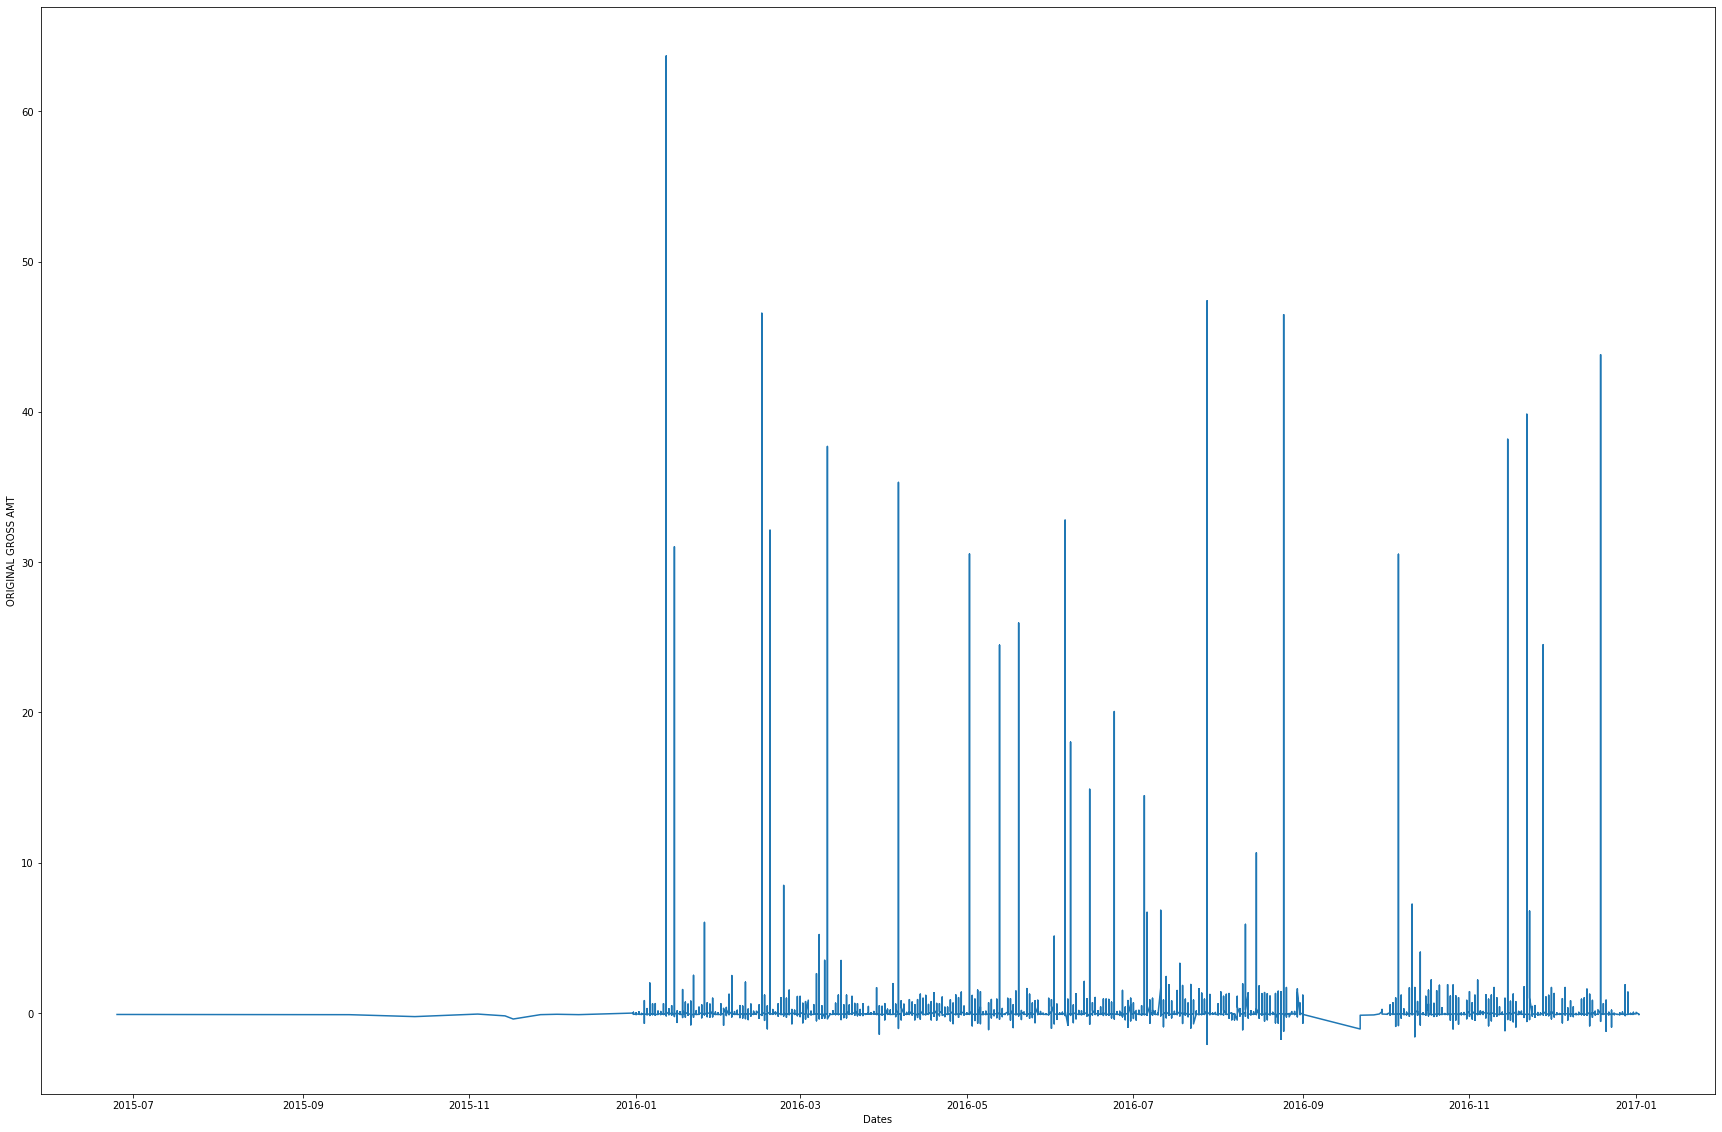

In [116]:
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

Text(0, 0.5, 'Cluster inertia')

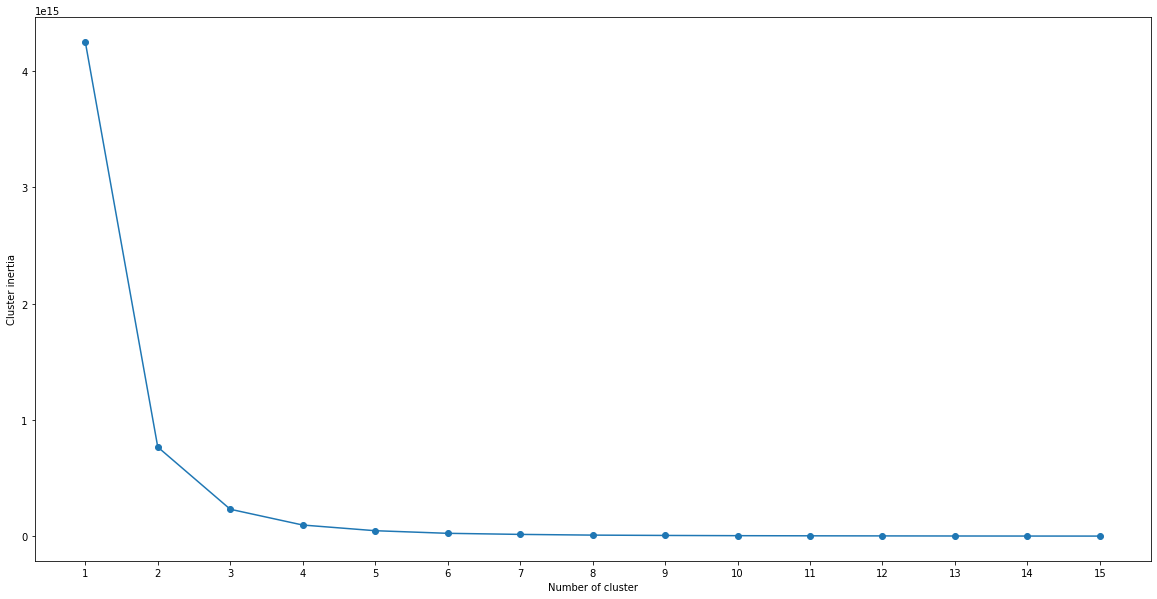

In [117]:
### Here we will do clustering using the KMeans algorithms
# Scaling the frequency of transactions by means amount of transactions
card_tr = card_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(card_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

Text(0, 0.5, 'The average transactions made by each person')

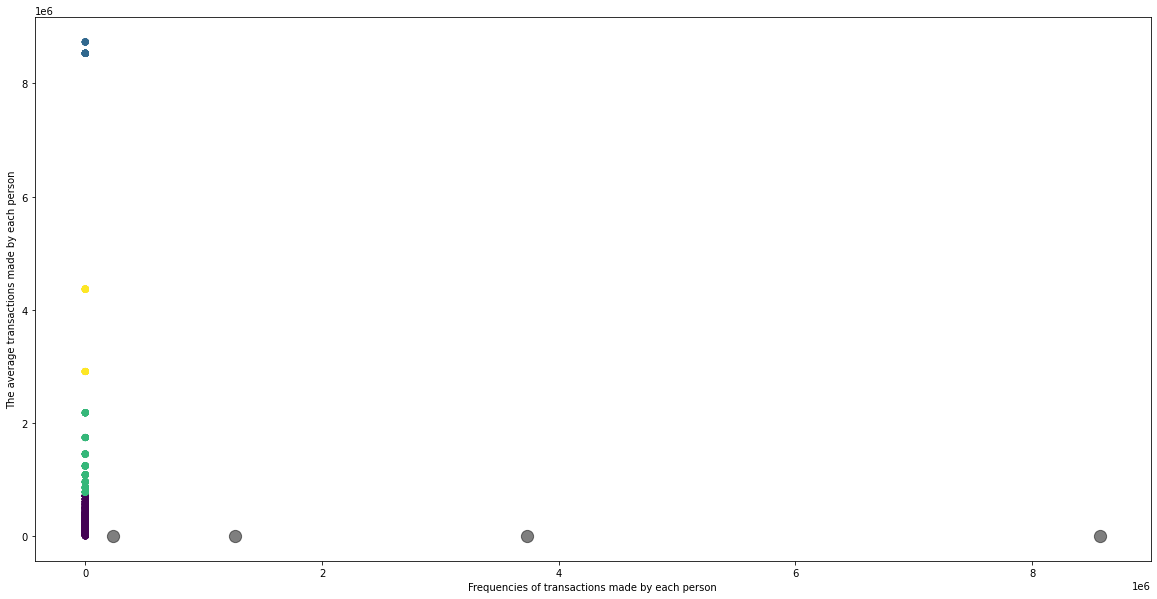

In [118]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(card_tr)
kmeans_predict = kmeans_model.predict(card_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(card_tr[:,1],card_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transactions made by each person')

## Based on merchants

In [119]:
### Converting categorical variables about marchants into numerical ones

# Frequency of transactions made in favor of ech unique merchant
merchant_vc = df['MERCHANT NAME'].value_counts()

# Transforming it into a DataFrame
merchant = pd.DataFrame(merchant_vc)
merchant = merchant.reset_index()
merchant.columns = ['unique_merchant','counts']

sum_tr = 0
merchant_trans = pd.DataFrame()
j = 0

# Average amount of transactions for each unique merchant
for m in merchant['unique_merchant']:
    for i in range(len(df['MERCHANT NAME'])):
        if df['MERCHANT NAME'][i] == m:
            sum_tr += df['ORIGINAL GROSS AMT'][i]
    merchant_trans = merchant_trans.append([(sum_tr/merchant['counts'][j])])
    j += 1

# Assembling previous data
merchant_data = pd.DataFrame()
merchant_data['merchant_name'] = merchant['unique_merchant']
merchant_data['trans_avg'] = merchant_trans.values.reshape(-1,1)
merchant_data['frequency'] = merchant['counts']

merchant_data = merchant_data.set_index(merchant_data.merchant_name)
merchant_data = merchant_data.drop(['merchant_name'], axis = 1)

merchant_data

,trans_avg,frequency
merchant_name,,
amazon uk marketplace,-7.646016e-02,5837
amazon uk retail,-2.717117e-01,2182
travelodge website,-2.275435e-01,1270
asda home shopping,-3.933832e-01,858
amazon uk retail amazon.c,-6.490717e-01,583
...,...,...
cambabest t/c 2,-1.353211e-01,1
paypal visualstres,-2.283408e-01,1
secure safe ltd,8.744175e-03,1


Text(0, 0.5, 'Average transactions')

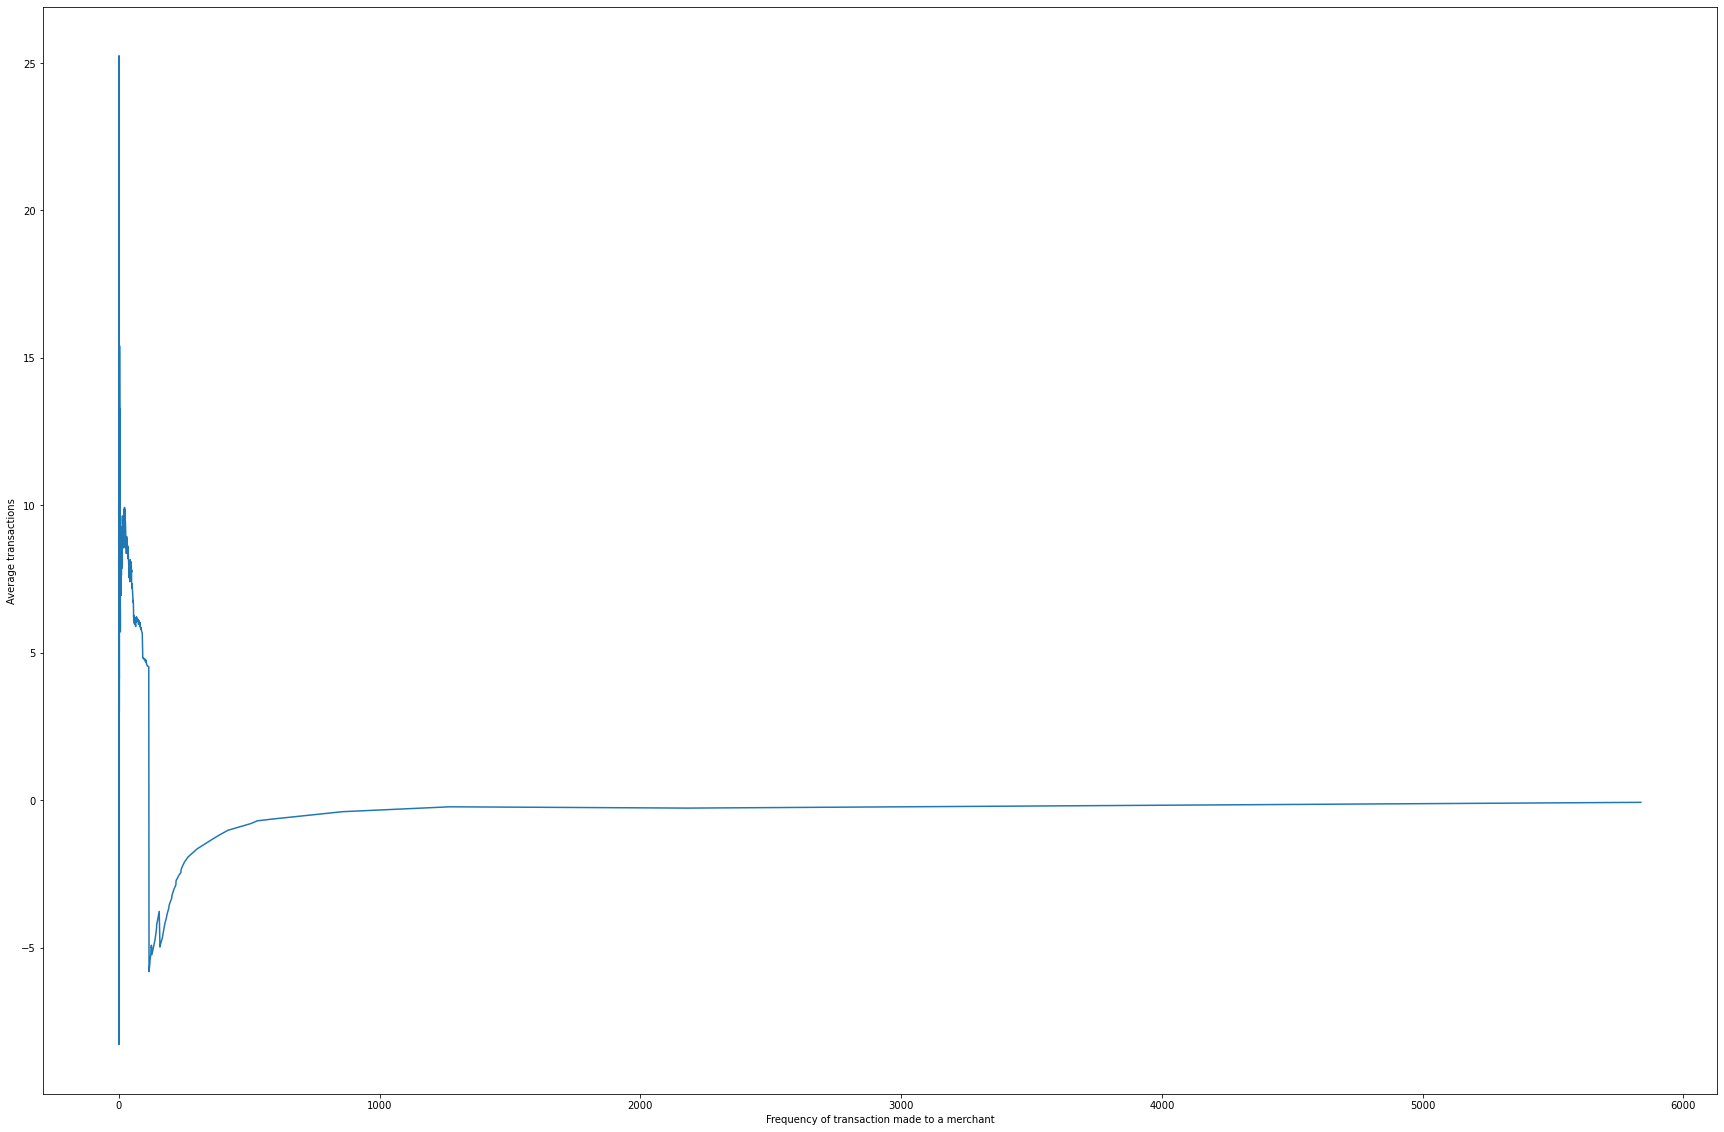

In [120]:
plt.figure(figsize=(30,20))
plt.plot(merchant_data.frequency,merchant_data.trans_avg)
plt.xlabel("Frequency of transaction made to a merchant")
plt.ylabel("Average transactions")

In [121]:
# The average number of merchants that receive negative average transactions
negative = 0
for i in range(len(merchant_data)):
    if merchant_data.trans_avg[i]<0:
        negative += 1
        
negativ_avg = negative/len(merchant_data)

negativ_avg

0.13494221617946975

Text(0, 0.5, 'Cluster inertia')

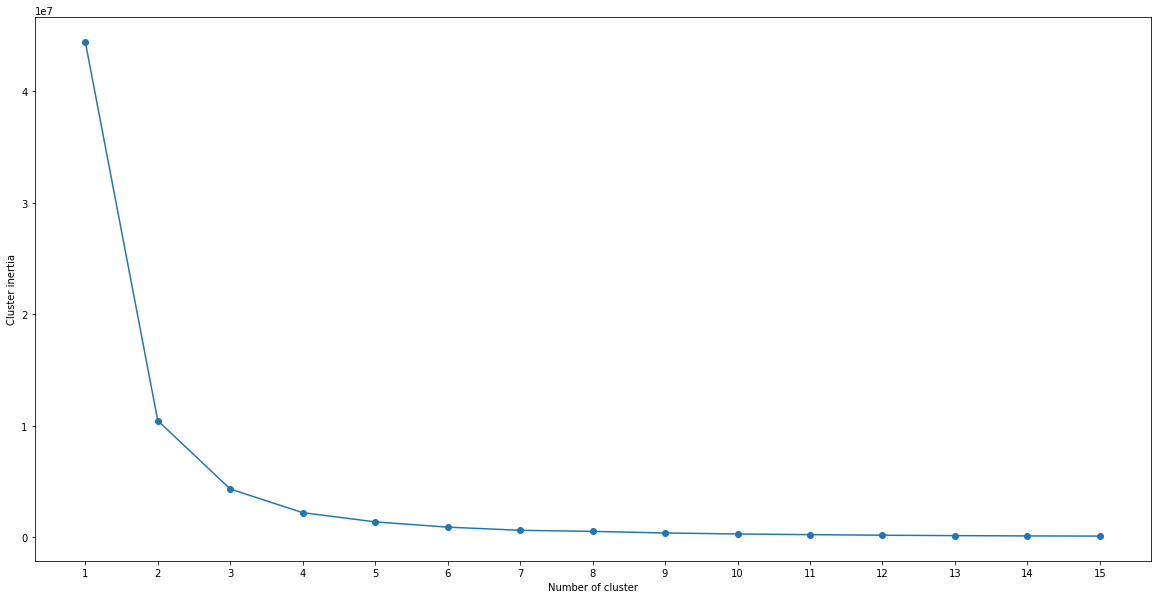

In [122]:
### Here we will do clustering using the KMeans algorithms
# Scaling the frequency of transactions by means amount of transactions
merchant_tr = merchant_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(merchant_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

Text(0, 0.5, 'The average transaction made by each person')

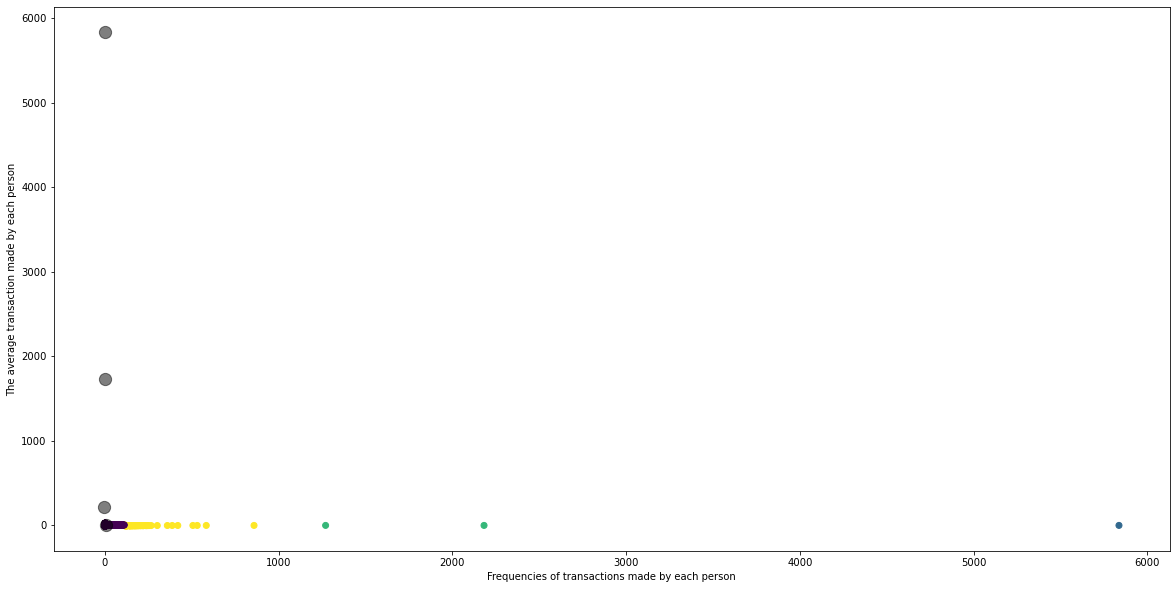

In [123]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(merchant_tr)
kmeans_predict = kmeans_model.predict(merchant_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(merchant_tr[:,1],merchant_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transaction made by each person')

## One-Class SVM

In [124]:
# Splitting the ORIGINAL GROSS AMOUNT time series data into training and testing datasets (70%+30%)

train_set = df.iloc[0:int(len(df)*0.7),1]
test_set = df.iloc[int(len(df)*0.7)+1:len(df),1]

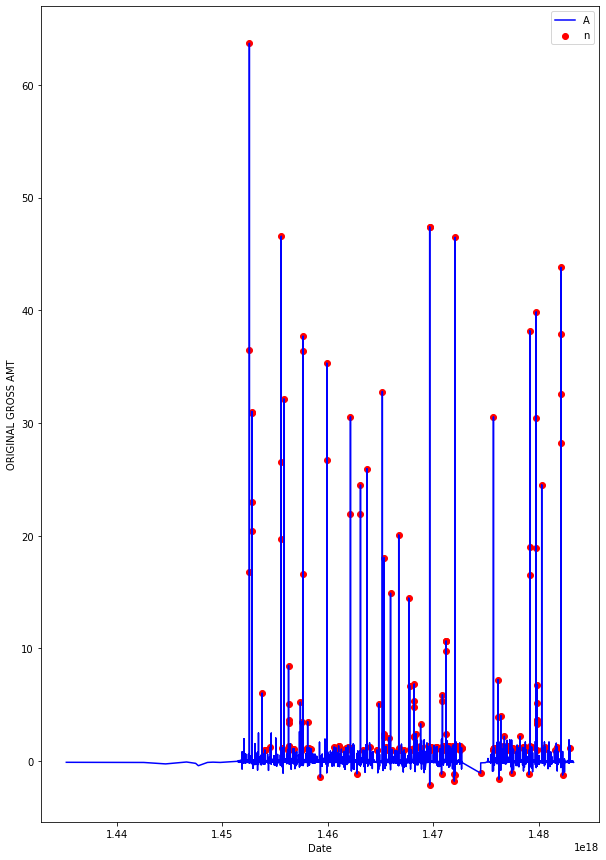

In [125]:
# Training the One-Class SVM model 

ocsvm_model = OneClassSVM(gamma ="auto",nu=0.0025).fit(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_model.predict(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_decision_func = ocsvm_model.decision_function(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_score = ocsvm_model.score_samples(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))

df['INT_TIME'] = df.index.astype(np.int64)
df['ocsvm_decis_func'] = ocsvm_decision_func
anomaly = df.loc[df['ocsvm_decis_func']<0, ['INT_TIME','ORIGINAL GROSS AMT']]
normal = df.loc[df['ocsvm_decis_func']>=0, ['INT_TIME','ORIGINAL GROSS AMT']]

fig, ax = plt.subplots(figsize=(10,15))
ax.plot(df['INT_TIME'],df['ORIGINAL GROSS AMT'], color='blue',label='Normal')
ax.scatter(anomaly['INT_TIME'],anomaly['ORIGINAL GROSS AMT'], color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('ORIGINAL GROSS AMT')
plt.legend('Anomaly detection using OCSVM')
plt.show()

In [126]:
anomaly_fraction = len(anomaly)/len(df['ORIGINAL GROSS AMT'])
anomaly_fraction

0.00543515338957997

# Forecasting future transactional behavior

In [127]:
# splitting training set and test test ona 70%:30% basis from the normal dataset extracted from oncsvm anomaly detection
normal_original_gross_amt = normal['ORIGINAL GROSS AMT']

train_set = normal.iloc[0:int(len(normal)*0.7),1]
train_set.index = pd.DatetimeIndex(train_set.index).to_period('D')
test_set = normal.iloc[int(len(normal)*0.7)+1:len(normal),1]
test_set.index = pd.DatetimeIndex(test_set.index).to_period('D')

In [147]:
history = [x for x in train_set]
predictions = list()
# walk-forward validation
for t in range(len(test_set)):
    model = ARIMA(history, order=(0,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_set[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_set, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test_set)
plt.plot(predictions, color='red')
plt.show()

predicted=0.051129, expected=2.009492
predicted=0.168087, expected=-0.042349


KeyboardInterrupt: 